In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Turn warnings off for notebook publication
import warnings
warnings.filterwarnings("ignore")


data = 'https://raw.githubusercontent.com/trojrobert/Classification-of-heart-disease-uci-data-/master/heart.csv'
df = pd.read_csv(data)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#one hot encoding
#obj_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
obj_cols = ['cp', 'restecg', 'slope', 'ca']
for col in obj_cols:
    #df[col]=df[col].apply(lambda x: 1 if  x != 0 else 0)
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,thal,target,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,2,1,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,2,1,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,2,1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['thal', 'target'], axis=1)
y = df['target']


In [ ]:
def standardise_data(X_train, X_test):
    """"
    Standardise training and tets data sets according to mean and standard
    deviation of test set
    
    Inputs
    ------
    X_train, X_test NumPy arrays
    
    Returns
    -------
    X_train_std, X_test_std
    """
    
    mu = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    
    X_train_std = (X_train - mu) / std
    X_test_std = (X_test - mu) /std
    
    return X_train_std, X_test_std

In [ ]:
def calculate_diagnostic_performance(actual, predicted):
    """     
    Inputs
    ------
    actual, predted numpy arrays (1 = +ve, 0 = -ve)
    
    Returns
    -------
    A dictionary of results:
    
    1)  accuracy: proportion of test results that are correct    
    2)  sensitivity: proportion of true +ve identified
    3)  specificity: proportion of true -ve identified
    4)  positive likelihood: increased probability of true +ve if test +ve
    5)  negative likelihood: reduced probability of true +ve if test -ve
    6)  diagnostic odds ratio: positive likelihood / negative likelihood
    7)  true positive rate: same as sensitivity
    8)  true negative rate: same as specificity
    9)  false positive rate: proportion of false +ves in true -ve patients
    10) false negative rate:  proportion of false -ves in true +ve patients
    11) positive predictive value: chance of true +ve if test +ve
    12) negative predictive value: chance of true -ve if test -ve
    13) actual positive rate: proportion of actual values that are +ve
    14) predicted positive rate: proportion of predicted vales that are +ve
    15) recall: same as sensitivity
    16) precision: the proportion of predicted +ve that are true +ve
    17) f1: 2 * ((precision * recall) / (precision + recall))

    *false positive rate is the percentage of healthy individuals who 
    incorrectly receive a positive test result
    * alse neagtive rate is the percentage of diseased individuals who 
    incorrectly receive a negative test result
    
    """
    
    # Calculate results 
    actual_positives = actual == 1
    actual_negatives = actual == 0
    test_positives = predicted == 1
    test_negatives = predicted == 0
    
    test_correct = actual == predicted
    accuracy = test_correct.mean()
    
    true_positives = actual_positives & test_positives
    false_positives = test_positives & actual_negatives
    true_negatives = actual_negatives & test_negatives
    false_negatives = test_negatives & actual_positives
    
    sensitivity = true_positives.sum() / actual_positives.sum()
    specificity = true_negatives.sum() / actual_negatives.sum()

    true_positive_rate = sensitivity
    true_negative_rate = specificity
    false_positive_rate = 1 - specificity
    false_negative_rate = 1 - sensitivity
    
    positive_likelihood = true_positive_rate / false_positive_rate
    negative_likelihood = false_positive_rate / true_negative_rate
    diagnostic_odds_ratio = positive_likelihood / negative_likelihood
    
    positive_predictive_value = true_positives.sum() / test_positives.sum()
    negative_predicitive_value = true_negatives.sum() / test_negatives.sum()
    
    actual_positive_rate = actual.mean()
    predicted_positive_rate = predicted.mean()
    
    recall = sensitivity
    precision = true_positives.sum() / actual_positives.sum()
    f1 = 2 * ((precision * recall) / (precision + recall))
    
    # Add results to dictionary
    results = dict()
    results['accuracy'] = accuracy
    results['sensitivity'] = sensitivity
    results['specificity'] = specificity
    results['positive_likelihood'] = positive_likelihood
    results['negative_likelihood'] = negative_likelihood
    results['diagnostic_odds_ratio'] = diagnostic_odds_ratio
    results['true_positive_rate'] = true_positive_rate
    results['true_negative_rate'] = true_negative_rate
    results['false_positive_rate'] = false_positive_rate
    results['false_negative_rate'] = false_negative_rate
    results['positive_predictive_value'] = positive_predictive_value
    results['negative_predicitive_value'] = negative_predicitive_value
    results['actual_positive_rate'] = actual_positive_rate
    results['predicted_positive_rate'] = predicted_positive_rate
    results['recall'] = recall
    results['precision'] = precision
    results['f1'] = f1
   
    return results

In [ ]:
def fit_and_test_logistic_regression_model(X_train, X_test, y_train, y_test):    
    """"
    Fit and test logistic regression model. 
    Return a dictionary of accuracy measures.
    Calls on `calculate_diagnostic_performance` to calculate results
    
    Inputs
    ------
    X_train, X_test NumPy arrays
    
    Returns
    -------
    A dictionary of accuracy results.
    """
    
    # Fit logistic regression model 
    lr = LogisticRegression(C=0.1)
    lr.fit(X_train,y_train)

    # Predict tets set labels
    y_pred = lr.predict(X_test)
    
    # Get accuracy results
    accuracy_results = calculate_diagnostic_performance(y_test, y_pred)
    
    return accuracy_results

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#PCA
def get_principal_component_model(data, n_components=0):
    """
    Principal component analysis
    
    Inputs
    ------
    data: raw data (DataFrame)
    
    Returns
    -------
    A dictionary of:
        model: pca model object
        transformed_X: transformed_data
        explained_variance: explained_variance
    """
    
    # If n_components not passed to function, use number of features in data
    if n_components == 0:
        n_components = data.shape[1]
    
    pca = PCA(n_components)
    transformed_X = pca.fit_transform(data)

    #fit_transform reduces X to the new datasize if n components is specified
    explained_variance = pca.explained_variance_ratio_
    
    # Compile a dictionary to return results
    results = {'model': pca,
               'transformed_X': transformed_X,
               'explained_variance': explained_variance}
    
    return results

In [ ]:
def make_synthetic_data_smote(X, y, number_of_samples=1000):
    """
    Synthetic data generation.
        
    Inputs
    ------
    original_data: X, y numpy arrays
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
    
    from imblearn.over_sampling import SMOTE
    
    count_label_0 = np.sum(y==0)
    count_label_1 = np.sum(y==1)
    
    n_class_0 = number_of_samples + count_label_0
    n_class_1 = number_of_samples + count_label_1

    X_resampled, y_resampled = SMOTE(
        sampling_strategy = {0:n_class_0, 1:n_class_1}).fit_resample(X, y)

    X_synthetic = X_resampled[len(X):]
    y_synthetic = y_resampled[len(y):]
                                                                   
    return X_synthetic, y_synthetic

In [ ]:
def make_synthetic_data_pc(X_original, y_original, number_of_samples=1000, 
                           n_components=0):
    """
    Synthetic data generation.
    Calls on `get_principal_component_model` for PCA model
    If number of components not defined then the function sets it to the number
      of features in X
    
    Inputs
    ------
    original_data: X, y numpy arrays
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
    
    # If number of PCA not passed, set to number fo features in X
    if n_components == 0:
        n_components = X_original.shape[1]
    
    # Split the training data into positive and negative
    mask = y_original == 1
    X_train_pos = X_original[mask]
    mask = y_original == 0
    X_train_neg = X_original[mask]
    
    # Pass negative and positive label X data sets to Principal Component Analysis 
    pca_pos = get_principal_component_model(X_train_pos, n_components)
    pca_neg = get_principal_component_model(X_train_neg, n_components)
    
    # Set up list to hold negative and positive label transformed data
    transformed_X = []
    
    # Create synthetic data for positive and neagtive PCA models 
    for pca_model in [pca_pos, pca_neg]:
        
        # Get PCA tranformed data
        transformed = pca_model['transformed_X']
        
        # Get means and standard deviations, to use for sampling
        means = transformed.mean(axis=0)
        stds = transformed.std(axis=0)
    
        # Make synthetic PC data using sampling from normal distributions
        synthetic_pca_data = np.zeros((number_of_samples, n_components))
        for pc in range(n_components):
            synthetic_pca_data[:, pc] = \
                np.random.normal(means[pc], stds[pc], size=number_of_samples)
        transformed_X.append(synthetic_pca_data)
        
    # Reverse transform data to create synthetic data to be used
    X_synthetic_pos = pca_pos['model'].inverse_transform(transformed_X[0])
    X_synthetic_neg = pca_neg['model'].inverse_transform(transformed_X[1])
    y_synthetic_pos = np.ones((X_synthetic_pos.shape[0],1))
    y_synthetic_neg = np.zeros((X_synthetic_neg.shape[0],1))
    # Combine positive and negative and shuffle rows
    X_synthetic = np.concatenate((X_synthetic_pos, X_synthetic_neg), axis=0)
    y_synthetic = np.concatenate((y_synthetic_pos, y_synthetic_neg), axis=0)
    
    # Randomise order of X, y
    synthetic = np.concatenate((X_synthetic, y_synthetic), axis=1)
    shuffle_index = np.random.permutation(np.arange(X_synthetic.shape[0]))
    synthetic = synthetic[shuffle_index]
    X_synthetic = synthetic[:,0:-1]
    y_synthetic = synthetic[:,-1]
                                                                   
    return X_synthetic, y_synthetic

In [ ]:
# Set up results DataFrame
results = pd.DataFrame()

In [ ]:
#PCA

In [ ]:
#SMOTE



In [ ]:
!pip install imblearn

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
integer_cols=['age','trestbps','chol','thalach','oldpeak']
binary_cols=['sex','fbs','exang']

obj_cols = ['cp', 'restecg', 'slope', 'ca']

# Set number of replicate runs
X_col_names=df.iloc[:,:-1].columns
one_hot_cols = [[x for x in X_col_names if x[0:4] == 'cp'],
               [x for x in X_col_names if x[0:21] == 'restecg'],
               [x for x in X_col_names if x[0:21] == 'slope'],
               [x for x in X_col_names if x[0:4] == 'ca']]

number_of_runs = 5

# Set up lists for results
accuracy_measure_names = []
accuracy_measure_data = []
synthetic_data = []

for run in range(number_of_runs):
    
    # Get synthetic data
    X_synthetic, y_synthetic = make_synthetic_data_smote(
        X, y, number_of_samples=1000)    
  # Print progress
    print (run + 1, end=' ')
    
    # Split training and test set
    X_train, X_test, y_train, y_test = split_into_train_test(X, y)

    # Standardise data (using synthetic data)
    X_train_std, X_test_std = standardise_data(X_synthetic, X_test)
    print(X_train_std.isnull().sum())
    # Get accuracy of fitted model
    accuracy = fit_and_test_logistic_regression_model(
        X_train_std, X_test_std, y_synthetic, y_test)
    
    # Get accuracy measure names if not previously done
    if len(accuracy_measure_names) == 0:
        for key, value in accuracy.items():
            accuracy_measure_names.append(key)
    
    # Get accuracy values
    run_accuracy_results = []
    for key, value in accuracy.items():
            run_accuracy_results.append(value)
            
    # Add results to results list
    accuracy_measure_data.append(run_accuracy_results)
    
    # Save synthetic data set
    # -----------------------
    
    # Create a data frame with id
    synth_df = pd.DataFrame()
    
    # Transfer X values to DataFrame
    synth_df=pd.concat([synth_df, 
                        pd.DataFrame(X_synthetic, columns=X_col_names)],
                        axis=1)
    
    # Make one hot as necessary
    for one_hot_list in one_hot_cols:    
        for index, row in synth_df.iterrows():
            x = row[one_hot_list]
            x_one_hot = make_one_hot(x)
            row[x_one_hot.index]= x_one_hot.values
            
    # Make integer as necessary
    for col in integer_cols:
        synth_df[col] = synth_df[col].round(0)
        
    # Clip binary cols
    for col in binary_cols:
        synth_df[col] = np.clip(synth_df[col],0,1)

    # Add a label
    y_list = list(y_synthetic)
    synth_df['label'] = y_list

    # Shuffle data
    synth_df = synth_df.sample(frac=1.0)
    
    # Add to synthetic data results list
    synthetic_data.append(synth_df)

# Strore mean and sem in results DataFrame 
accuracy_array = np.array(accuracy_measure_data)
results['smote_mean'] = accuracy_array.mean(axis=0)
results['smote_sem'] = accuracy_array.std(axis=0)/np.sqrt(number_of_runs)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
descriptive_stats_all_runs = []
original_data=df
for run in range(number_of_runs):
    
    synth_df = synthetic_data[run]
  
    descriptive_stats = pd.DataFrame()

    descriptive_stats['Original pos_label mean'] = \
        original_data[original_data['label'] == 1].mean()

    descriptive_stats['Synthetic pos_label mean'] = \
        synth_df[synth_df['label'] == 1].mean()

    descriptive_stats['Original neg_label mean'] = \
        original_data[original_data['label'] == 0].mean()

    descriptive_stats['Synthetic neg_label mean'] = \
        synth_df[synth_df['label'] == 0].mean()

    descriptive_stats['Original pos_label std'] = \
        original_data[original_data['label'] == 1].std()

    descriptive_stats['Synthetic pos_label std'] = \
        synth_df[synth_df['label'] == 1].std()

    descriptive_stats['Original neg_label std'] = \
        original_data[original_data['label'] == 0].std()

    descriptive_stats['Synthetic neg_label std'] = \
        synth_df[synth_df['label'] == 0].std()
    
    descriptive_stats_all_runs.append(descriptive_stats)

In [ ]:
colours = ['k', 'b', 'g', 'r', 'y', 'c', 'm']
fig = plt.figure(figsize=(10,10))

# Note: Set x and y limits to avoid plotting values that are very close to zero

# Negative mean
ax1 = fig.add_subplot(221)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original neg_label mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic neg_label mean'].copy()
    x.drop(labels ='label', inplace=True)
    y.drop(labels ='label', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax1.scatter(x,y, color=colour, alpha=0.5)
ax1.set_xlabel('Original data')
ax1.set_ylabel('Synthetic data')
ax1.set_xlim(1e-3, 1e2)
ax1.set_ylim(1e-3, 1e2)
ax1.set_title('Negative label samples mean')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()

# Positive mean
ax2 = fig.add_subplot(222)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original pos_label mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic pos_label mean'].copy()
    x.drop(labels ='label', inplace=True)
    y.drop(labels ='label', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax2.scatter(x,y, color=colour, alpha=0.5)
ax2.set_xlabel('Original data')
ax2.set_ylabel('Synthetic data')
ax2.set_title('Positive label samples mean')
ax2.set_xlim(1e-3, 1e2)
ax2.set_ylim(1e-3, 1e2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

# Negative standard deviation
ax3 = fig.add_subplot(223)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original neg_label std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic neg_label std'].copy()
    x.drop(labels ='label', inplace=True)
    y.drop(labels ='label', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax3.scatter(x,y, color=colour, alpha=0.5)
ax3.set_xlabel('Original data')
ax3.set_ylabel('Synthetic data')
ax3.set_title('Negative label standard deviation')
ax3.set_xlim(1e-2, 1e2)
ax3.set_ylim(1e-2, 1e2)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid()

# Positive standard deviation
ax4 = fig.add_subplot(224)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original pos_label std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic pos_label std'].copy()
    x.drop(labels ='label', inplace=True)
    y.drop(labels ='label', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax4.scatter(x,y, color=colour, alpha=0.5)
ax4.set_xlabel('Original data')
ax4.set_ylabel('Synthetic data')
ax4.set_title('Positive label standard deviation')
ax4.set_xlim(1e-2, 1e2)
ax4.set_ylim(1e-2, 1e2)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid()

plt.tight_layout(pad=2)
#plt.savefig('Output/smote_correls.png', facecolor='w', dpi=300)
plt.show()

In [ ]:
correl_mean_neg = []
correl_std_neg = []
correl_mean_pos = []
correl_std_pos = []

for run in range(number_of_runs):
    # Get correlation of means
    x = descriptive_stats_all_runs[run]['Original neg_label mean']
    y = descriptive_stats_all_runs[run]['Synthetic neg_label mean']
    correl_mean_neg.append(np.corrcoef(x,y)[0,1])
    x = descriptive_stats_all_runs[run]['Original pos_label mean']
    y = descriptive_stats_all_runs[run]['Synthetic pos_label mean']
    correl_mean_pos.append(np.corrcoef(x,y)[0,1])
    
    # Get correlation of standard deviations
    x = descriptive_stats_all_runs[run]['Original neg_label std']
    y = descriptive_stats_all_runs[run]['Synthetic neg_label std']
    correl_std_neg.append(np.corrcoef(x,y)[0,1])
    x = descriptive_stats_all_runs[run]['Original pos_label std']
    y = descriptive_stats_all_runs[run]['Synthetic pos_label std']
    correl_std_pos.append(np.corrcoef(x,y)[0,1])


# # Get correlation of means
mean_r_square_mean_neg = np.mean(np.square(correl_mean_neg))
mean_r_square_mean_pos = np.mean(np.square(correl_mean_pos))
sem_square_mean_neg = np.std(np.square(correl_mean_neg))/np.sqrt(number_of_runs)
sem_square_mean_pos = np.std(np.square(correl_mean_pos))/np.sqrt(number_of_runs)

print ('R-square of means (negative), mean (std): ', end='')
print (f'{mean_r_square_mean_neg:0.3f} ({sem_square_mean_neg:0.3f})')
print ('R-square of means (positive), mean (std): ', end='')
print (f'{mean_r_square_mean_pos:0.3f} ({sem_square_mean_pos:0.3f})')

# # Get correlation of standard deviations
mean_r_square_sd_neg = np.mean(np.square(correl_std_neg))
mean_r_square_sd_pos = np.mean(np.square(correl_std_pos))
sem_square_sd_neg = np.std(np.square(correl_std_neg))/np.sqrt(number_of_runs)
sem_square_sd_pos = np.std(np.square(correl_std_pos))/np.sqrt(number_of_runs)

print ('R-square of standard deviations (negative), mean (sem): ', end='')
print (f'{mean_r_square_sd_neg:0.3f} ({sem_square_sd_neg:0.3f})')
print ('R-square of standard deviations (positive), mean (sem): ', end='')
print (f'{mean_r_square_sd_pos:0.3f} ({sem_square_sd_pos:0.3f})')

In [ ]:
descriptive_stats_all_runs[0]

In [ ]:
neg_correlation_original = []
neg_correlation_synthetic = []
pos_correlation_original = []
pos_correlation_synthetic = []

correl_coeff_neg = []
correl_coeff_pos= []

# Original data
mask = original_data['label'] == 0
neg_o = original_data[mask].copy()
neg_o.drop('label', axis=1, inplace=True)
neg_correlation_original = neg_o.corr().values.flatten()

mask = original_data['label'] == 1
pos_o = original_data[mask].copy()
pos_o.drop('label', axis=1, inplace=True)
pos_correlation_original = pos_o.corr().values.flatten()

# Synthetic data
for i in range (number_of_runs):
    data_s = synthetic_data[i]
    
    mask = data_s['label'] == 0
    neg_s = data_s[mask].copy()
    neg_s.drop('label', axis=1, inplace=True)
    corr_neg_s = neg_s.corr().values.flatten()
    neg_correlation_synthetic.append(corr_neg_s)
    
    mask = data_s['label'] == 1
    pos_s = data_s[mask].copy()
    pos_s.drop('label', axis=1, inplace=True)
    corr_pos_s = pos_s.corr().values.flatten()
    pos_correlation_synthetic.append(corr_pos_s)

    # Get correlation coefficients
    df = pd.DataFrame()
    df['original'] = neg_correlation_original
    df['synthetic'] = corr_neg_s    
    correl_coeff_neg.append(df.corr().loc['original']['synthetic'])    
    
    df = pd.DataFrame()
    df['original'] = pos_correlation_original
    df['synthetic'] = corr_pos_s
    correl_coeff_pos.append(df.corr().loc['original']['synthetic'])

In [ ]:
colours = ['k', 'b', 'g', 'r', 'y', 'c', 'm']
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
for run in range(number_of_runs):
    colour = colours[run % 7] # Cycle through 7 colours
    ax1.scatter(
        neg_correlation_original,
        neg_correlation_synthetic[run],
        color=colour,
        alpha=0.25)
ax1.grid()
ax1.set_xlabel('Original data correlation')
ax1.set_ylabel('Synthetic data correlation')
ax1.set_title('Negative label samples correlation of features')

ax2 = fig.add_subplot(122)
for run in range(number_of_runs):
    colour = colours[run % 7] # Cycle through 7 colours
    ax2.scatter(
        pos_correlation_original,
        pos_correlation_synthetic[run],
        color=colour,
        alpha=0.25)
ax2.grid()
ax2.set_xlabel('Original data correlation')
ax2.set_ylabel('Synthetic data correlation')
ax2.set_title('Positive label samples correlation of features')

plt.tight_layout(pad=2)
#plt.savefig('Output/smote_cov.png', facecolor='w', dpi=300)
plt.show()

In [ ]:
r_square_neg_mean = np.mean(np.square(correl_coeff_neg))
r_square_pos_mean = np.mean(np.square(correl_coeff_pos))
r_square_neg_sem = np.std(np.square(correl_coeff_neg))/np.sqrt(number_of_runs)
r_square_pos_sem = np.std(np.square(correl_coeff_pos))/np.sqrt(number_of_runs)

print ('Corrleation of correlations (negative), mean (sem): ', end='')
print (f'{r_square_neg_mean:0.3f} ({r_square_neg_sem:0.3f})')
print ('Corrleation of correlations (positive), mean (sem): ', end = '')

GAN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
device = 'cpu'
print('Device in use:', device)

Device in use: cpu


Below we define the Standalone - Discriminator class for the GAN

In [ ]:
class Discriminator(torch.nn.Module):

    def __init__(self, features):
        """
        Constructor method for discriminator network.
        Inherits from parent torch.nn.Module class.
        """
        
        # Inherit from parent class
        super(Discriminator, self).__init__()
        
        # Define layers
        self.fc1 = torch.nn.Linear(features, features * 5)
        self.fc2 = torch.nn.Linear(features * 5, features * 5)
        self.fc3 = torch.nn.Linear(features * 5, 1)

    def forward(self, x):
        """Foward pass through network."""
        
        x = self.fc1(x) # Fully connected layer
        x = F.dropout(x, p=0.2) # Apply dropout
        x = F.relu(x) # ReLU activation
        x = self.fc2(x) # Fully connected layer
        x = F.dropout(x, p=0.2) # Apply dropout
        x = F.relu(x) # ReLU activation
        x = self.fc3(x) # Fully connected layer
        x = torch.sigmoid(x) # Sigmoid output (0-1)

        return x

Below we define the standalone-generator function

In [ ]:
class Generator(torch.nn.Module):

    def __init__(self, input_dim, features):
        """
        Constructor method for generator network.
        Inherits from parent torch.nn.Module class.
        """
        
        # Inherit from parent class
        super(Generator, self).__init__()
        
        # Define layers
        self.fc1 = torch.nn.Linear(input_dim, features * 5)
        self.fc2 = torch.nn.Linear(features * 5, features * 5)
        self.fc3 = torch.nn.Linear(features * 5, features)

    def forward(self, x):
        """Foward pass through network."""
        
        x = self.fc1(x) # Fully connected layer
        x = F.dropout(x, p=0.2) # Apply dropout
        x = F.relu(x) # ReLU activation
        x = self.fc2(x) # Fully connected layer
        x = F.dropout(x, p=0.2) # Apply dropout
        x = F.relu(x) # ReLU activation
        x = self.fc3(x) # Fully connected layer 

        return x

Below is the function to generate real samples

In [ ]:
def generate_real_samples(X, n):
    """Sample data from real data set"""
    
    # Combine X and y, shuffle, split X and y and return sample
    shuffle_index = np.random.permutation(np.arange(X.shape[0])) 
    shuffled = X[shuffle_index]
    X_sample = shuffled[0:n]
    y_sample = np.ones((n, 1))
    
    return X_sample, y_sample

Below is the function to generate synthetic samples

In [ ]:
def generate_latent_points(latent_dim, n):
    """
    Creates a NumPy array of random points for input into generator.
    Size is number of replications needed * number of latent input features in
    generator network.    
    """
    
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    
    return x_input

In [ ]:
def generate_synthetic_samples(generator, latent_dim, n):
    """
    Get synthetic data, by passing an array of random latent
    points (input for generator network) to generator.
    """
    
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs (use eval mode of generator)
    generator.eval()
    X = generator(torch.Tensor(x_input).to(device))
    # Copy to CPU before converting to NumPy
    X = X.to('cpu')
    X = X.detach().numpy()
    # create class labels
    y = np.zeros((n, 1))
    
    return X, y

Below is the function to train the discriminator and generator

In [ ]:
def train(X, y, g_model, d_model, latent_dim, n_epochs, n_batch, learning_rate):
    """
    Train discriminator and generator. 
    Training proceedsd through a number of epochs.
    In each epoch the discriminaror is first trained with a batch of ral and
    fake (synthetic samples), to learn to distinguish between fake and real. The
    generator is trained by evaluating the output against whether it foolds the 
    discriminator into classifying the output as real.
    """

    # Set up optimizers (generator network is set to have slower learning rate)
    criterion = torch.nn.BCELoss()  # Binary cross entropy for both networks
    d_optimizer = torch.optim.Adam(d_model.parameters(), lr=learning_rate)
    g_optimizer = torch.optim.Adam(g_model.parameters(), lr=learning_rate/2)
       
    # loop through epochs
    for i in range(n_epochs):

        # PREPARE FAKE AND REAL DATA
        # Use half batch size real, half batch size fake
        half_batch = int(n_batch / 2)
        x_real, y_real = generate_real_samples(X, half_batch)
        x_fake, y_fake = generate_synthetic_samples(
            g_model, latent_dim, half_batch)

        # UPDATE DISCRIMINATOR
        d_model.zero_grad() # reset optimizer
        # Update on real data
        x_train_tensor = torch.Tensor(x_real).to(device) # Convert to GPU tensor
        y_train_tensor = torch.Tensor(y_real).to(device) # Convert to GPU tensor
        ypred_train = d_model(x_train_tensor) # predict y
        d_loss = criterion(ypred_train, y_train_tensor) # Calculate loss
        d_loss.backward() # Back propagate loss through network
        d_optimizer.step() # Update network to reduce loss
        # Update on fake data
        x_train_tensor = torch.Tensor(x_fake).to(device) # Convert to GPU tensor
        y_train_tensor = torch.Tensor(y_fake).to(device) # Convert to GPU tensor
        ypred_train = d_model(x_train_tensor) # predict y
        d_loss = criterion(ypred_train, y_train_tensor) # Calculate loss
        d_loss.backward() # Back propagate loss through network
        d_optimizer.step() # Update network to reduce loss

        # UPDATE GENERATOR
        # Get generator output
        x_gan_input = generate_latent_points(latent_dim, n_batch)
        x_gan_output = g_model(torch.Tensor(x_gan_input).to(device))
        # Get discriminator output from created samples
        gan_judgement = d_model(x_gan_output)
        # Create 'real sample' label for synthetic data to test whether 
        #   discriminator is fooled (no loss when discriminator is fooled)
        y_gan_true_label = torch.Tensor(np.ones((n_batch, 1))).to(device)
        # Get loss and update generator
        g_model.zero_grad()
        g_loss = criterion(gan_judgement, y_gan_true_label)
        g_loss.backward() # Back propagate loss through network
        g_optimizer.step() # Update network to reduce loss

Putting the code all together

In [ ]:
def make_synthetic_data_gan(X_original, y_original, batch_size=32, 
                            latent_dim=12, epochs=25000, learning_rate=1e-3, 
                            number_of_samples=1000):
    
    """
    Synthetic data generation, using a GAN
    
    Inputs
    ------
    original_data: X, y numpy arrays
    batch_size: batch size to use when training networks
    latent_dim: input dimension for generator network
    number_of_samples: number of synthetic samples to generate
    n_components: number of principal components to use for data synthesis
    
    Returns
    -------
    X_synthetic: NumPy array
    y_synthetic: NumPy array

    """
        
    # Split the training data into positive and negative
    mask = y_original == 1
    X_train_pos = X_original[mask]
    y_train_pos = np.ones((X_train_pos.shape[0], 1))
    
    mask = y_original == 0
    X_train_neg = X_original[mask]
    y_train_neg = np.zeros((X_train_neg.shape[0], 1))
    
    # Set up list for positive and negative synthetic data sets
    synthetic_X_sets = []
    
    # Run fit twice: once for positive label examples, the other for negative
    for training_set in [(X_train_pos, y_train_pos),
                         (X_train_neg, y_train_neg)]:
        
        X_train, y_train = training_set
   
        # create the discriminator
        X_dim = X_train.shape[1]
        discriminator = Discriminator(X_dim).to(device)
            
        # create the generator
        generator = Generator(latent_dim, X_dim).to(device)
        
        # train model
        train(X_train, y_train, generator, discriminator, latent_dim, epochs, 
                batch_size, learning_rate)
        
        # Use generator to create synthetic samples
        x_fake, y_fake = generate_synthetic_samples(
            generator, latent_dim, number_of_samples)    
      
        # Add to lists
        synthetic_X_sets.append(x_fake)     
        
    # Combine positive and negative and shuffle rows
    X_synthetic = np.concatenate(
            (synthetic_X_sets[0], synthetic_X_sets[1]), axis=0)
    
    y_synthetic_pos = np.ones((number_of_samples, 1))
    y_synthetic_neg = np.zeros((number_of_samples, 1))
    y_synthetic = np.concatenate((y_synthetic_pos, y_synthetic_neg), axis=0)
    
    # Randomise order of X, y
    synthetic = np.concatenate((X_synthetic, y_synthetic), axis=1)
    shuffle_index = np.random.permutation(np.arange(X_synthetic.shape[0]))
    synthetic = synthetic[shuffle_index]
    X_synthetic = synthetic[:,0:-1]
    y_synthetic = synthetic[:,-1]
                                                                   
    return X_synthetic, y_synthetic

 ## GAN Main Code

In [ ]:
col_names = df.columns
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,thal,target,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,1,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,2,1,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,2,1,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,2,1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,3,0,...,1,0,0,1,0,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,3,0,...,1,0,0,1,0,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,3,0,...,1,0,0,1,0,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,3,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# Get baseline of data from logistic regression model
original = fit_and_test_logistic_regression_model(X_train_std, X_test_std, y_train, y_test)
original

# Make synthetic data
X_synthetic, y_synthetic = make_synthetic_data_gan(X.values, y.values)

# Standardise data (using synthetic data)
X_train_std, X_test_std = standardise_data(X_synthetic, X_test)

# Get accuracy of fitted model
accuracy = fit_and_test_logistic_regression_model(
    X_train_std, X_test_std, y_synthetic, y_test)

accuracy

KeyboardInterrupt: 

In [ ]:

X2 = df.drop(['thal', 'target'], axis=1)
y2 = df['target'].copy()

In [ ]:
for column in col_names:
    print(column, 'values', df[column].unique())

age values [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex values [1 0]
cp values [3 2 1 0]
trestbps values [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol values [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 1

In [ ]:
one_hot_columns = ['cp','restecg', 'slope_values', 'ca values', 'thal values']

In [ ]:
def split_into_train_test(X, y, test_proportion=0.25):    
    """"
    Randomly split X and y numpy arrays into training and test data sets
    
    Inputs
    ------
    X and y NumPy arrays
    
    Returns
    -------
    X_test, X_train, y_test, y_train Numpy arrays
    """
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, shuffle=True, test_size=test_proportion)
        
    return X_train, X_test, y_train, y_test

In [ ]:
# Set number of replicate runs
results = pd.DataFrame()
number_of_runs = 5
# Set up lists for results
accuracy_measure_names = []
accuracy_measure_data = []
synthetic_data = []

for run in range(number_of_runs):
    
    # Print progress
    print (run + 1, end=' ')
    
    # Split training and test set
    X_train, X_test, y_train, y_test = split_into_train_test(X.values, y.values)

    # Standardise data    
    X_train_std, X_test_std = standardise_data(X_train, X_test)

    # Get accuracy of fitted model
    accuracy = fit_and_test_logistic_regression_model(
        X_train_std, X_test_std, y_train, y_test)
    
    # Get accuracy measure names if not previously done
    if len(accuracy_measure_names) == 0:
        for key, value in accuracy.items():
            accuracy_measure_names.append(key)
    
    # Get accuracy values
    run_accuracy_results = []
    for key, value in accuracy.items():
            run_accuracy_results.append(value)
            
    # Add results to results list
    accuracy_measure_data.append(run_accuracy_results)
    
    # Output accuracy
    percent_accuracy = accuracy['accuracy'] * 100
    print(f'Accuracy: {percent_accuracy:3.1f}')

# Strore mean and sem in results DataFrame 
accuracy_array = np.array(accuracy_measure_data)
results['raw_mean'] = accuracy_array.mean(axis=0)
results['raw_sem'] = accuracy_array.std(axis=0)/np.sqrt(number_of_runs)
results.index = accuracy_measure_names

1 Accuracy: 85.5
2 Accuracy: 81.6
3 Accuracy: 82.9
4 Accuracy: 82.9
5 Accuracy: 81.6


In [ ]:
accuracy_array

array([[ 0.82894737,  0.91428571,  0.75609756,  3.74857143,  0.32258065,
        11.62057143,  0.91428571,  0.75609756,  0.24390244,  0.08571429,
         0.76190476,  0.91176471,  0.46052632,  0.55263158,  0.91428571,
         0.91428571,  0.91428571],
       [ 0.82894737,  0.90243902,  0.74285714,  3.50948509,  0.34615385,
        10.1385125 ,  0.90243902,  0.74285714,  0.25714286,  0.09756098,
         0.80434783,  0.86666667,  0.53947368,  0.60526316,  0.90243902,
         0.90243902,  0.90243902],
       [ 0.82894737,  0.84090909,  0.8125    ,  4.48484848,  0.23076923,
        19.43434343,  0.84090909,  0.8125    ,  0.1875    ,  0.15909091,
         0.86046512,  0.78787879,  0.57894737,  0.56578947,  0.84090909,
         0.84090909,  0.84090909],
       [ 0.82894737,  0.88095238,  0.76470588,  3.74404762,  0.30769231,
        12.16815476,  0.88095238,  0.76470588,  0.23529412,  0.11904762,
         0.82222222,  0.83870968,  0.55263158,  0.59210526,  0.88095238,
         0.88095238

Below cell takes a while to run

In [ ]:
col_names = X2.columns

In [ ]:
X2

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,1,0,0,1,0,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,0,1,0,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,1,0,...,1,0,0,1,0,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,1,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
col_names.drop('target')

KeyError: "['target'] not found in axis"

In [ ]:
#col_names = col_names.drop('target')
len(col_names)

27

In [ ]:
col_names

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4'],
      dtype='object')

In [ ]:
X_col_names = X_col_names.drop('target')

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_1', 'thal_2'],
      dtype='object')

In [ ]:
X2.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4'],
      dtype='object')

In [ ]:
binary_cols = ['sex','ca_0','ca_1','ca_2','ca_3','ca_4','fbs','restecg_0','restecg_1','restecg_2','exang','slope_0','slope_1','slope_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3']
integer_cols = []
for value in X2.columns:
    if value not in binary_cols:
        integer_cols.append(value)



23

In [ ]:
X2

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,1,0,0,1,0,1,0,0,0,0
299,45,1,110,264,0,132,0,1.2,0,0,...,1,0,0,1,0,1,0,0,0,0
300,68,1,144,193,1,141,0,3.4,1,0,...,1,0,0,1,0,0,0,1,0,0
301,57,1,130,131,0,115,1,1.2,1,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
accuracy_measure_names = []
accuracy_measure_data = []

# Set number of replicate runs
number_of_runs = 1

for run in range(number_of_runs):
    
    # Print progress
    print (run + 1, end=' ')

    # Make synthetic data
    X_synthetic, y_synthetic = make_synthetic_data_gan(X2.values, y2.values)

    # Split training and test set
    X_train, X_test, y_train, y_test = split_into_train_test(X2.values, y2.values)

    # Standardise data (using synthetic data)
    X_train_std, X_test_std = standardise_data(X_synthetic, X_test)

    # Get accuracy of fitted model
    accuracy = fit_and_test_logistic_regression_model(
        X_train_std, X_test_std, y_synthetic, y_test)

    # Get accuracy measure names if not previously done
    if len(accuracy_measure_names) == 0:
        for key, value in accuracy.items():
            accuracy_measure_names.append(key)

    # Get accuracy values
    run_accuracy_results = []
    for key, value in accuracy.items():
            run_accuracy_results.append(value)
            
    # Add results to results list
    accuracy_measure_data.append(run_accuracy_results)
    
    # Output accuracy
    percent_accuracy = accuracy['accuracy'] * 100
    print(f'Accuracy: {percent_accuracy:3.1f}')
    
    # Save synthetic data set
    # -----------------------
    
    # Create a data frame with id
    synth_df = pd.DataFrame()
    
        # Transfer X values to DataFrame
    synth_df=pd.concat([synth_df, 
                        pd.DataFrame(X_synthetic, columns=col_names)],
                        axis=1)
    
    # Make one hot as necessary
    for one_hot_list in one_hot_cols:    
        for index, row in synth_df.iterrows():
            x = row[one_hot_list]
            x_one_hot = make_one_hot(x)
            row[x_one_hot.index]= x_one_hot.values
            
    # Make integer as necessary
    for col in integer_cols:
        synth_df[col] = synth_df[col].round(0)
        
    # Clip binary cols
    for col in binary_cols:
        synth_df[col] = np.clip(synth_df[col],0,1)

    # Add a label
    y_list = list(y_synthetic)
    synth_df['label'] = y_list

    # Shuffle data
    synth_df = synth_df.sample(frac=1.0)
    
    # Add to synthetic data results list
    synthetic_data.append(synth_df)
    
# Store mean and sem in results DataFrame 
accuracy_array = np.array(accuracy_measure_data)
results['gan_mean'] = accuracy_array.mean(axis=0)
results['gan_sem'] = accuracy_array.std(axis=0)/np.sqrt(number_of_runs)

1 Accuracy: 48.7


In [ ]:
results

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,1,145,233,1,0,150,0,2.3,0,0
1,37,1,1,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,1,0
3,56,1,1,120,236,0,1,178,0,0.8,1,0
4,57,0,0,120,354,0,1,163,1,0.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,1,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [ ]:
accuracy_measure_names = []
accuracy_measure_data = []

# Set number of replicate runs
number_of_runs = 1

run = 0
    
# Print progress
print (run + 1, end=' ')

# Make synthetic data
X_synthetic, y_synthetic = make_synthetic_data_gan(X2.iloc[0:16].values, y2[0:16].values)

1 

ValueError: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([0, 1])) is deprecated. Please ensure they have the same size.

In [ ]:
y2[0:16].values.shape

(16,)

In [ ]:
np.array(y2.values[23]).reshape(-1,1)

array([[1]])

In [ ]:
for i in range(10):
    print(':(\n:D', end = '\t', sep = ':o')

:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	:(
:D	

In [ ]:
synth_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'label'],
      dtype='object')

In [ ]:
synth_df.rename(columns = {'label':'target'}, inplace = True)

In [ ]:
original_data

,original
0,1.000000
1,-0.141135
2,0.066881
3,0.240272
4,0.112610
...,...
164,0.057557
165,0.097444
166,0.019666
167,-0.034970


In [ ]:
original_data.drop(columns = 'thal', inplace = True)

KeyError: "['thal'] not found in axis"

In [ ]:
original_data = df.copy()


In [ ]:
df = df.drop(columns = ['thal'])

In [ ]:
descriptive_stats_all_runs = []
original_data = df.copy()
for run in range(number_of_runs):
    
    synth_df = synthetic_data[run]
    synth_df.rename(columns = {'label':'target'}, inplace = True)
  
    descriptive_stats = pd.DataFrame()

    descriptive_stats['Original pos_label mean'] = \
        original_data[original_data['target'] == 1].mean()

    descriptive_stats['Synthetic pos_label mean'] = \
        synth_df[synth_df['target'] == 1].mean()

    descriptive_stats['Original neg_label mean'] = \
        original_data[original_data['target'] == 0].mean()

    descriptive_stats['Synthetic neg_label mean'] = \
        synth_df[synth_df['target'] == 0].mean()

    descriptive_stats['Original pos_label std'] = \
        original_data[original_data['target'] == 1].std()

    descriptive_stats['Synthetic pos_label std'] = \
        synth_df[synth_df['target'] == 1].std()

    descriptive_stats['Original neg_label std'] = \
        original_data[original_data['target'] == 0].std()

    descriptive_stats['Synthetic neg_label std'] = \
        synth_df[synth_df['target'] == 0].std()
    
    descriptive_stats_all_runs.append(descriptive_stats)

In [ ]:
col_names

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4'],
      dtype='object')

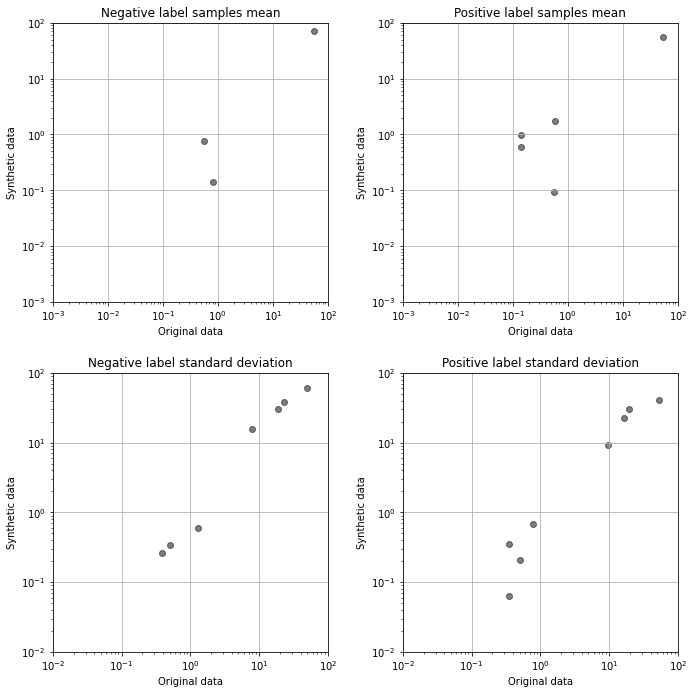

In [ ]:
colours = ['k', 'b', 'g', 'r', 'y', 'c', 'm']

fig = plt.figure(figsize=(10,10))

# Note: Set x and y limits to avoid plotting values that are very close to zero

# Negative mean
ax1 = fig.add_subplot(221)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original neg_label mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic neg_label mean'].copy()
    x.drop(labels ='target', inplace=True)
    y.drop(labels ='target', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax1.scatter(x,y, color=colour, alpha=0.5)
ax1.set_xlabel('Original data')
ax1.set_ylabel('Synthetic data')
ax1.set_xlim(1e-3, 1e2)
ax1.set_ylim(1e-3, 1e2)
ax1.set_title('Negative label samples mean')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()

# Positive mean
ax2 = fig.add_subplot(222)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original pos_label mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic pos_label mean'].copy()
    x.drop(labels ='target', inplace=True)
    y.drop(labels ='target', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax2.scatter(x,y, color=colour, alpha=0.5)
ax2.set_xlabel('Original data')
ax2.set_ylabel('Synthetic data')
ax2.set_title('Positive label samples mean')
ax2.set_xlim(1e-3, 1e2)
ax2.set_ylim(1e-3, 1e2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

# Negative standard deviation
ax3 = fig.add_subplot(223)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original neg_label std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic neg_label std'].copy()
    x.drop(labels ='target', inplace=True)
    y.drop(labels ='target', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax3.scatter(x,y, color=colour, alpha=0.5)
ax3.set_xlabel('Original data')
ax3.set_ylabel('Synthetic data')
ax3.set_title('Negative label standard deviation')
ax3.set_xlim(1e-2, 1e2)
ax3.set_ylim(1e-2, 1e2)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid()

# Positive standard deviation
ax4 = fig.add_subplot(224)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[0]['Original pos_label std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic pos_label std'].copy()
    x.drop(labels ='target', inplace=True)
    y.drop(labels ='target', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax4.scatter(x,y, color=colour, alpha=0.5)
ax4.set_xlabel('Original data')
ax4.set_ylabel('Synthetic data')
ax4.set_title('Positive label standard deviation')
ax4.set_xlim(1e-2, 1e2)
ax4.set_ylim(1e-2, 1e2)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid()

plt.tight_layout(pad=2)
plt.savefig('gan.png', facecolor='w', dpi=300)

plt.show()

In [ ]:
descriptive_stats_all_runs[0]

,Original pos_label mean,Synthetic pos_label mean,Original neg_label mean,Synthetic neg_label mean,Original pos_label std,Synthetic pos_label std,Original neg_label std,Synthetic neg_label std
age,52.496970,55.418000,56.601449,71.022000,9.550651,9.122527,7.962082,15.535085
sex,0.563636,0.092771,0.826087,0.139867,0.497444,0.205128,0.380416,0.263255
trestbps,129.303030,138.303000,134.398551,143.081000,16.169613,22.880050,18.729944,30.759496
chol,242.230303,237.562000,251.086957,276.978000,53.552872,41.011219,49.454614,59.930887
fbs,0.139394,0.989373,0.159420,0.000009,0.347412,0.062629,0.367401,0.000294
thalach,158.466667,177.136000,139.101449,171.720000,19.174276,30.205229,22.598782,37.969136
exang,0.139394,0.596278,0.550725,0.771499,0.347412,0.354640,0.499232,0.345549
oldpeak,0.583030,1.772000,1.585507,-1.482000,0.780683,0.681528,1.300340,0.596684
thal,2.121212,NaN,2.543478,NaN,0.465752,NaN,0.684762,NaN
target,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
correl_mean_neg = []
correl_std_neg = []
correl_mean_pos = []
correl_std_pos = []

for run in range(number_of_runs):
    # Get correlation of means
    x = descriptive_stats_all_runs[run]['Original neg_label mean']
    y = descriptive_stats_all_runs[run]['Synthetic neg_label mean']
    correl_mean_neg.append(np.corrcoef(x,y)[0,1])
    x = descriptive_stats_all_runs[run]['Original pos_label mean']
    y = descriptive_stats_all_runs[run]['Synthetic pos_label mean']
    correl_mean_pos.append(np.corrcoef(x,y)[0,1])
    
    # Get correlation of standard deviations
    x = descriptive_stats_all_runs[run]['Original neg_label std']
    y = descriptive_stats_all_runs[run]['Synthetic neg_label std']
    correl_std_neg.append(np.corrcoef(x,y)[0,1])
    x = descriptive_stats_all_runs[run]['Original pos_label std']
    y = descriptive_stats_all_runs[run]['Synthetic pos_label std']
    correl_std_pos.append(np.corrcoef(x,y)[0,1])

# Get correlation of means
mean_r_square_mean_neg = np.mean(np.square(correl_mean_neg))
mean_r_square_mean_pos = np.mean(np.square(correl_mean_pos))
sem_square_mean_neg = np.std(np.square(correl_mean_neg))/np.sqrt(number_of_runs)
sem_square_mean_pos = np.std(np.square(correl_mean_pos))/np.sqrt(number_of_runs)

print ('R-square of means (negative), mean (std): ', end='')
print (f'{mean_r_square_mean_neg:0.3f} ({sem_square_mean_neg:0.3f})')
print ('R-square of means (positive), mean (std): ', end='')
print (f'{mean_r_square_mean_pos:0.3f} ({sem_square_mean_pos:0.3f})')

# Get correlation of standard deviations
mean_r_square_sd_neg = np.mean(np.square(correl_std_neg))
mean_r_square_sd_pos = np.mean(np.square(correl_std_pos))
sem_square_sd_neg = np.std(np.square(correl_std_neg))/np.sqrt(number_of_runs)
sem_square_sd_pos = np.std(np.square(correl_std_pos))/np.sqrt(number_of_runs)

print ('R-square of standard deviations (negative), mean (sem): ', end='')
print (f'{mean_r_square_sd_neg:0.3f} ({sem_square_sd_neg:0.3f})')
print ('R-square of standard deviations (positive), mean (sem): ', end='')
print (f'{mean_r_square_sd_pos:0.3f} ({sem_square_sd_pos:0.3f})')

R-square of means (negative), mean (std): nan (nan)
R-square of means (positive), mean (std): nan (nan)
R-square of standard deviations (negative), mean (sem): nan (nan)
R-square of standard deviations (positive), mean (sem): nan (nan)


Single run example

In [ ]:
descriptive_stats_all_runs[0]


,Original pos_label mean,Synthetic pos_label mean,Original neg_label mean,Synthetic neg_label mean,Original pos_label std,Synthetic pos_label std,Original neg_label std,Synthetic neg_label std
age,52.496970,55.418000,56.601449,71.022000,9.550651,9.122527,7.962082,15.535085
sex,0.563636,0.092771,0.826087,0.139867,0.497444,0.205128,0.380416,0.263255
cp,0.763636,0.003509,0.246377,0.762123,0.426141,0.042023,0.432470,0.342147
trestbps,129.303030,138.303000,134.398551,143.081000,16.169613,22.880050,18.729944,30.759496
chol,242.230303,237.562000,251.086957,276.978000,53.552872,41.011219,49.454614,59.930887
fbs,0.139394,0.989373,0.159420,0.000009,0.347412,0.062629,0.367401,0.000294
restecg,0.587879,0.947130,0.427536,0.041873,0.493715,0.123449,0.496523,0.124070
thalach,158.466667,177.136000,139.101449,171.720000,19.174276,30.205229,22.598782,37.969136
exang,0.139394,0.596278,0.550725,0.771499,0.347412,0.354640,0.499232,0.345549
oldpeak,0.583030,1.772000,1.585507,-1.482000,0.780683,0.681528,1.300340,0.596684


In [ ]:
corr_neg_s.shape

(144,)

In [ ]:
neg_correlation_original = []
neg_correlation_synthetic = []
pos_correlation_original = []
pos_correlation_synthetic = []

correl_coeff_neg = []
correl_coeff_pos= []

# Original data
mask = original_data['target'] == 0
neg_o = original_data[mask].copy()
neg_o.drop('target', axis=1, inplace=True)
neg_correlation_original = neg_o.corr().values.flatten()

mask = original_data['target'] == 1
pos_o = original_data[mask].copy()
pos_o.drop('target', axis=1, inplace=True)
pos_correlation_original = pos_o.corr().values.flatten()

# Synthetic data
for i in range (number_of_runs):
    data_s = synthetic_data[i]
    
    mask = data_s['target'] == 0
    neg_s = data_s[mask].copy()
    neg_s.drop('target', axis=1, inplace=True)
    corr_neg_s = neg_s.corr().values.flatten()
    neg_correlation_synthetic.append(corr_neg_s)
    
    mask = data_s['target'] == 1
    pos_s = data_s[mask].copy()
    pos_s.drop('target', axis=1, inplace=True)
    corr_pos_s = pos_s.corr().values.flatten()
    pos_correlation_synthetic.append(corr_pos_s)

    # Get correlation coefficients
    df = pd.DataFrame()
    df['original'] = neg_correlation_original
    df['synthetic'] = corr_neg_s    
    correl_coeff_neg.append(df.corr().loc['original']['synthetic'])    
    
    df = pd.DataFrame()
    df['original'] = pos_correlation_original
    df['synthetic'] = corr_pos_s
    correl_coeff_pos.append(df.corr().loc['original']['synthetic'])

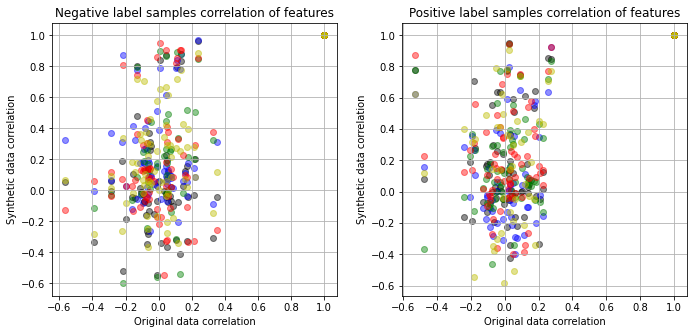

In [ ]:
colours = ['k', 'b', 'g', 'r', 'y', 'c', 'm']
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
for run in range(number_of_runs):
    colour = colours[run % 7] # Cycle through 7 colours
    ax1.scatter(
        neg_correlation_original,
        neg_correlation_synthetic[run],
        color=colour,
        alpha=0.25)
ax1.grid()
ax1.set_xlabel('Original data correlation')
ax1.set_ylabel('Synthetic data correlation')
ax1.set_title('Negative label samples correlation of features')

ax2 = fig.add_subplot(122)
for run in range(number_of_runs):
    colour = colours[run % 7] # Cycle through 7 colours
    ax2.scatter(
        pos_correlation_original,
        pos_correlation_synthetic[run],
        color=colour,
        alpha=0.25)
ax2.grid()
ax2.set_xlabel('Original data correlation')
ax2.set_ylabel('Synthetic data correlation')
ax2.set_title('Positive label samples correlation of features')

plt.tight_layout(pad=2)
plt.savefig('gan2.png', facecolor='w', dpi=300)
plt.show()

In [ ]:
r_square_neg_mean = np.mean(np.square(correl_coeff_neg))
r_square_pos_mean = np.mean(np.square(correl_coeff_pos))
r_square_neg_sem = np.std(np.square(correl_coeff_neg))/np.sqrt(number_of_runs)
r_square_pos_sem = np.std(np.square(correl_coeff_pos))/np.sqrt(number_of_runs)

print ('Corrleation of correlations (negative), mean (sem): ', end='')
print (f'{r_square_neg_mean:0.3f} ({r_square_neg_sem:0.3f})')
print ('Corrleation of correlations (positive), mean (sem): ', end = '')
print (f'{r_square_pos_mean:0.3f} ({r_square_pos_sem:0.3f})')

Corrleation of correlations (negative), mean (sem): 0.431 (0.051)
Corrleation of correlations (positive), mean (sem): 0.325 (0.015)


In [ ]:
X

NameError: name 'X' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5fc01772-88f7-4232-9b22-2c02e22f550b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>